In [7]:
# importation
import numpy as np
from torch.autograd import Variable
import torch
import matplotlib.pyplot as plt
%matplotlib inline
# local
from FBResNet.myfunc import Physics
from FBResNet.myfunc import MyMatmul
from FBResNet.main import FBRestNet
from FBResNet.model import MyModel
from FBResNet.posttreat import Export_hyper

### Parametres - experimental conditions

In [13]:
exp1 = FBRestNet(experimentation=Physics(2000,50,0.5,1), constraint = 'cube',\
                 nb_blocks=20, noise = 0.05,\
                 folder = './', im_set="Set1",batch_size=[300,1],\
                 lr=1e-3, nb_epochs=[10,1])

### Synthetic dataset

In [14]:
train_set, val_set = exp1.CreateDataSet()

### Training

epoch :  0  -----  validation :  0.0036704950522622
           ----- initial error : 0.6138284913819245
epoch :  1  -----  validation :  0.0029803414081195087
           ----- initial error : 0.6138284913819245
epoch :  2  -----  validation :  0.002114715249832682
           ----- initial error : 0.6138284913819245
epoch :  3  -----  validation :  0.0013266375739329655
           ----- initial error : 0.6138284913819245
epoch :  4  -----  validation :  0.0010887596379486946
           ----- initial error : 0.6138284913819245
epoch :  5  -----  validation :  0.0010768228086744048
           ----- initial error : 0.6138284913819245
epoch :  6  -----  validation :  0.001068653560430517
           ----- initial error : 0.6138284913819245
epoch :  7  -----  validation :  0.0010655573945530135
           ----- initial error : 0.6138284913819245
epoch :  8  -----  validation :  0.0010607396298754875
           ----- initial error : 0.6138284913819245
epoch :  9  -----  validation :  0.0010590

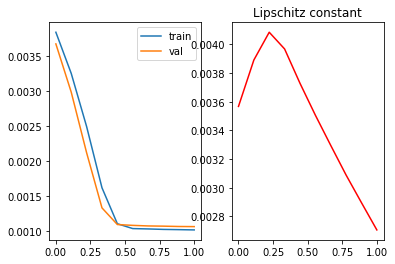

Final Lipschitz constant =  0.002705601695815965


In [15]:
exp1.train(train_set,val_set,save_model=True)

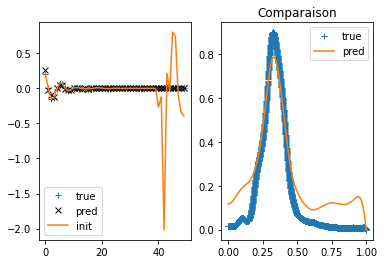

Erreur de sortir :  0.18001196920467066
Erreur initiale :  96.82622878287201


In [16]:
avrg_loss = exp1.test(train_set)

### Gaussian test

<class 'str'>
x-xp/x = 0.04514559602429578


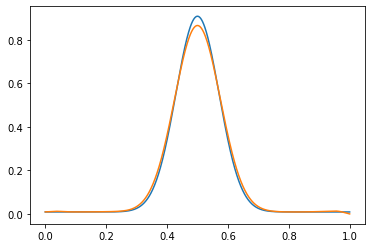

In [12]:
exp1.test_gauss()

### Lipschitz constant

In [ ]:
exp1.model.Lipschitz(opt1="semi",opt2="entree11")

In [ ]:
exp1.model.Lipschitz(opt1="semi",opt2="entree01")